In [13]:
import re
import copy
import sys
import json
sys.path.append("./../")
from vicon_imu_data_process.const import DATA_PATH, SAMPLE_FREQUENCY
import pandas as pd
import numpy as np
from vicon_imu_data_process.process_landing_data import *
from estimation_study import *
from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS
from estimation_assessment.scores import *



## Checking similarity of walking and landing dataset for model traning

In [14]:
norm_walking_subjects_trials_data = load_subjects_dataset(os.path.join(DATA_PATH, 'kam_norm_walking_data.hdf5'))
norm_landing_subjects_trials_data = load_subjects_dataset(os.path.join(DATA_PATH, 'kam_norm_landing_data.hdf5'))

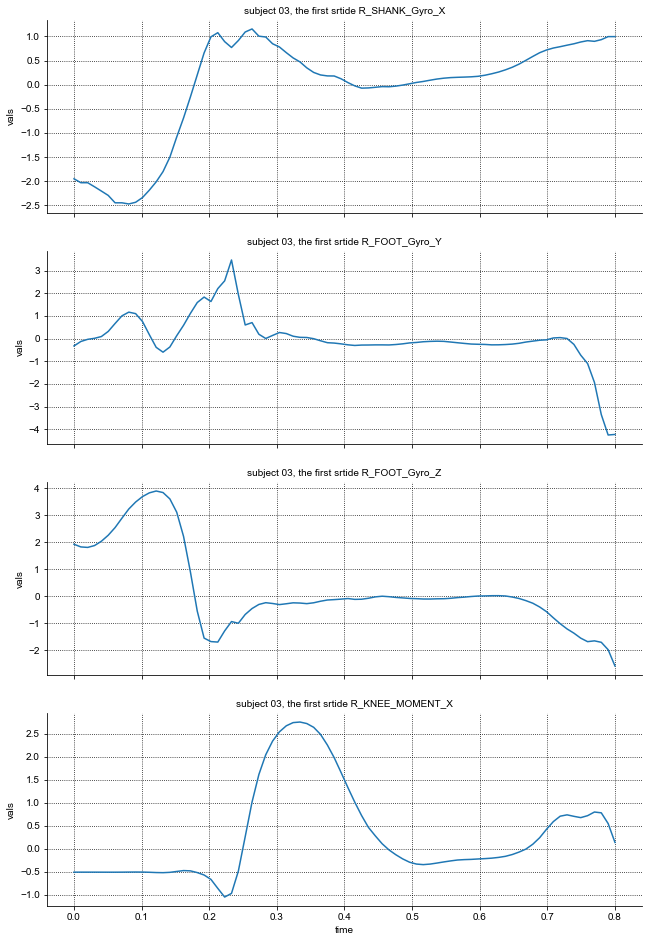

In [16]:
data = norm_walking_subjects_trials_data['subject_03']['0']
displayed_data = data[['R_SHANK_Gyro_X','R_FOOT_Gyro_Y','R_FOOT_Gyro_Z', 'R_KNEE_MOMENT_X']]
plot_rawdataset_curves(displayed_data,figheight=15,figtitle='subject 03, the first srtide',show=True,col_wrap=1)

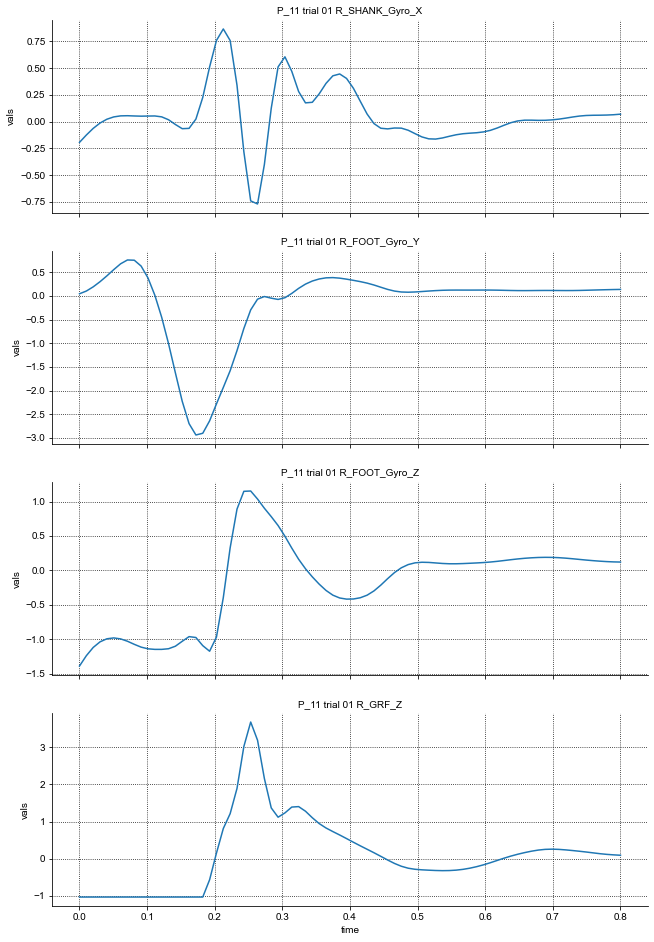

In [11]:
data = norm_landing_subjects_trials_data['P_08_zhangboyuan']['01']
displayed_data = data[['R_SHANK_Gyro_X','R_FOOT_Gyro_Y','R_FOOT_Gyro_Z', 'R_GRF_Z']]
plot_rawdataset_curves(displayed_data,figheight=15,figtitle='P_11 trial 01',show=True,col_wrap=1)

In [10]:
norm_landing_subjects_trials_data.keys()

dict_keys(['P_08_zhangboyuan', 'P_10_dongxuan', 'P_11_liuchunyu', 'P_13_xulibang', 'P_14_hunan', 'P_15_liuzhaoyu', 'P_16_zhangjinduo', 'P_17_congyuanqi', 'P_18_hezhonghai', 'P_19_xiongyihui', 'P_20_xuanweicheng', 'P_21_wujianing', 'P_22_zhangning', 'P_23_wangjinhong', 'P_24_liziqing'])

In [2]:
training_folder = "/media/sun/DATA/drop_landing_workspace/results/training_testing/2022-08-19/training_152333"
trained_model = load_trained_model(training_folder)

In [8]:
trained_model.layers[0].trainable=False
trained_model.layers[1].trainable=False


In [13]:
hyperparams['trained_model'] = trained_model

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f8f89eae970>>


In [2]:
subjects_trials_data= load_subjects_dataset(os.path.join(DATA_PATH,'norm_landing_data.hdf5'))

In [6]:
subjects_trials_data['P_08_zhangboyuan']['01'].shape

(80, 50)

## Model analysis

In [3]:
training_folder = "/media/sun/DATA/drop_landing_workspace/results/training_testing/2022-08-23/train_test_loops/08_53_05/training_090008"
trained_model = load_trained_model(training_folder)

In [11]:

for layer in trained_model.layers:
    print(layer.name)

bidirectional
dropout
dense
dropout_1
dense_1
dense_2
